In [1]:
import os
import cv2
import numpy as np
from time import time
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
# Data directories
synthetic_train_dir = r"C:\Users\Nitesh\Downloads\new\Dataset\Train_Alphabet"
synthetic_test_dir = r"C:\Users\Nitesh\Downloads\new\Dataset\Test_Alphabet"

# Classes in the dataset
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
           'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 
           'Y', 'Z', 'Blank']

In [3]:
# Load synthetic dataset
def load_data(synthetic_train_dir):
    images = []
    labels = []
    size = (32, 32)
    for index, folder in enumerate(classes):
        folder_path = os.path.join(synthetic_train_dir, folder)
        for image in os.listdir(folder_path):
            temp_img = cv2.imread(os.path.join(folder_path, image))
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32') / 255.0
    labels = utils.to_categorical(labels, num_classes=len(classes))
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
    
    print('Loaded', len(x_train), 'images for training, Train data shape =', x_train.shape)
    print('Loaded', len(x_test), 'images for testing, Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

# Load data
start = time()
x_train, x_test, y_train, y_test = load_data(synthetic_train_dir)
print('Loading time:', time() - start)

Loaded 21870 images for training, Train data shape = (21870, 32, 32, 3)
Loaded 2430 images for testing, Test data shape = (2430, 32, 32, 3)
Loading time: 665.8519220352173


C:\Users\Nitesh\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
308/308 [==============================] - ETA: 0s - loss: 2.2516 - accuracy: 0.3641
Epoch 1: val_accuracy improved from -inf to 0.04527, saving model to best_model.h5
308/308 [==============================] - 217s 696ms/step - loss: 2.2516 - accuracy: 0.3641 - val_loss: 11.9155 - val_accuracy: 0.0453
Epoch 2/10
308/308 [==============================] - ETA: 0s - loss: 0.5842 - accuracy: 0.8099
Epoch 2: val_accuracy improved from 0.04527 to 0.73251, saving model to best_model.h5
308/308 [==============================] - 214s 695ms/step - loss: 0.5842 - accuracy: 0.8099 - val_loss: 0.8889 - val_accuracy: 0.7325
Epoch 3/10
308/308 [==============================] - ETA: 0s - loss: 0.2834 - accuracy: 0.9094
Epoch 3: val_accuracy improved from 0.73251 to 0.89620, saving model to best_model.h5
308/308 [==============================] - 218s 707ms/step - loss: 0.2834 - accuracy: 0.9094 - val_loss: 0.3444 - val_accuracy: 0.8962
Epoch 4/10
308/308 [==============================]

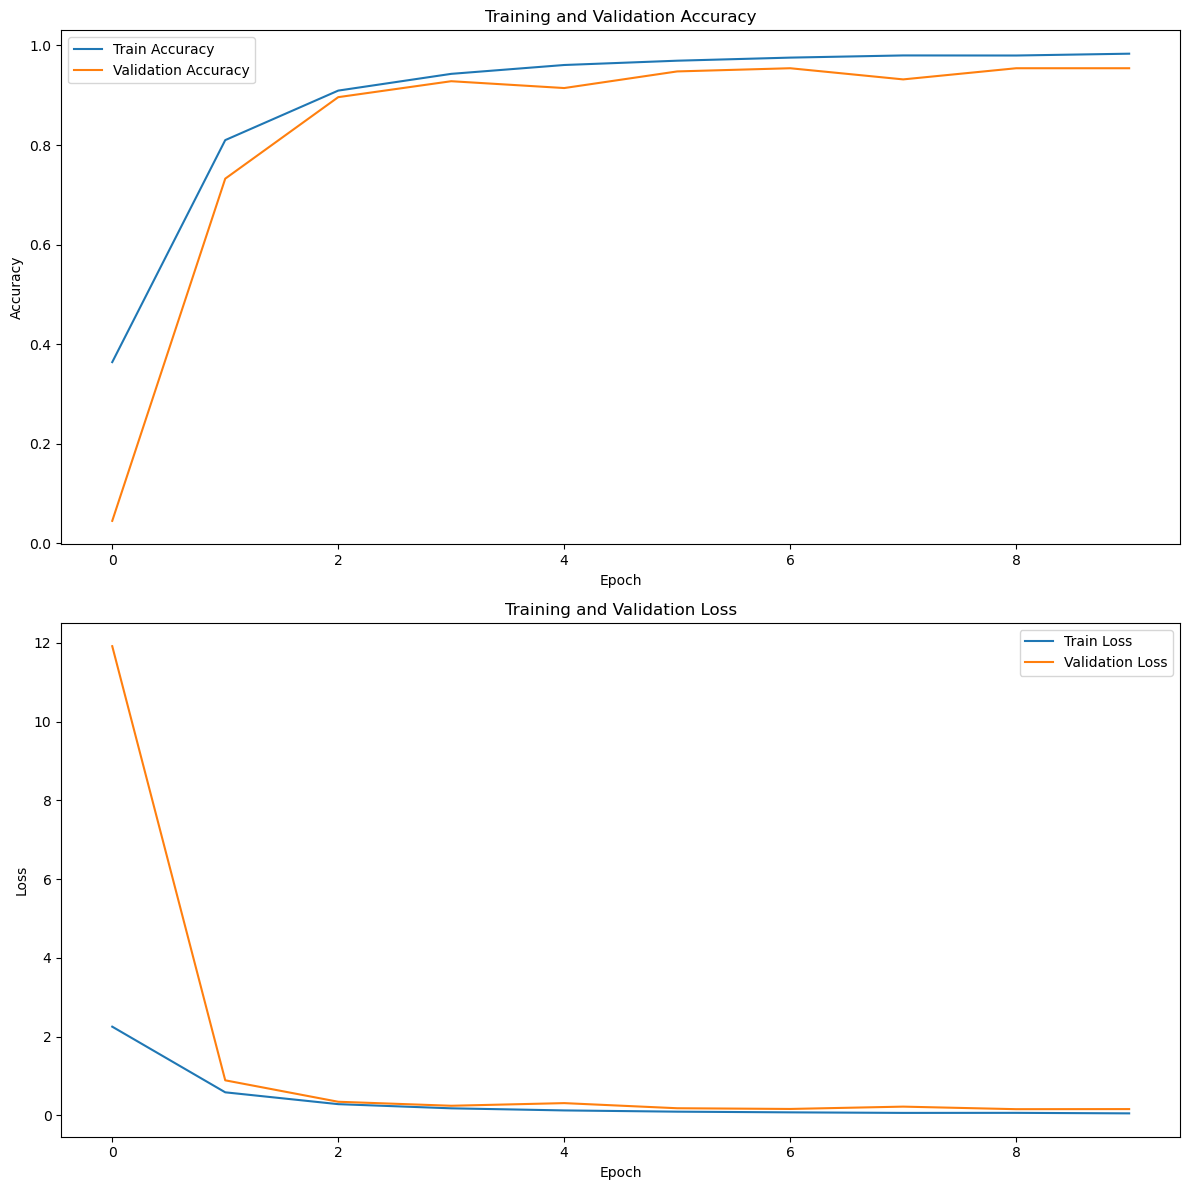

76/76 [==============================] - 7s 79ms/step - loss: 0.1620 - accuracy: 0.9465

Training Time: 2161.55 seconds
Test Accuracy: 94.65%
Test Loss: 0.1620
Testing Time: 7.79 seconds


In [4]:
# Model configuration
num_classes = len(classes)  # Now 27 classes
batch = 64
epochs = 10
learning_rate = 0.001

# Build the model
model = Sequential()

# First convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Function to train the model and evaluate the results
def results(model):
    adam = Adam(lr=learning_rate)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

    # Start training the model
    start = time()
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
    history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.1, shuffle=True, verbose=1, callbacks=[checkpoint])
    train_time = time() - start
    model.summary()

    # Plotting training & validation accuracy and loss
    plt.figure(figsize=(12, 12))

    # Accuracy plot
    plt.subplot(2, 1, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(2, 1, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.tight_layout()
    plt.show()

    # Load the best model and evaluate on the test data
    start = time()
    best_model = load_model('best_model.h5')
    test_loss, test_acc = best_model.evaluate(x_test, y_test)
    test_time = time() - start

    # Print results
    print('\nTraining Time: {:.2f} seconds'.format(train_time))
    print('Test Accuracy: {:.2f}%'.format(test_acc * 100))
    print('Test Loss: {:.4f}'.format(test_loss))
    print('Testing Time: {:.2f} seconds'.format(test_time))

# Train the model and evaluate the results
results(model)